# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import json

# Import API key                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

#print(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:
# set up lists to hold reponse info
city_list = []
country_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
date_list = []
counter = 0
record_counter = 0
setcount = 1


for city in cities:
    counter += 1
    if (counter % 50 == 0):
        setcount += 1
        record_counter = 0
        print(setcount)
        print(record_counter)
        print(counter)
    record_counter += 1
    print("processing Record " + str(record_counter) + " of Set " + str(setcount) + " | " + city)
    try:
        weather_response = requests.get(query_url + city).json()
        time.sleep(1)
        #print(weather_response)
        city_list.append(weather_response['name'])
        lat_list.append(weather_response['coord']['lat'])
        lng_list.append(weather_response['coord']['lon'])
        max_temp_list.append(weather_response['main']['temp_max'])
        humidity_list.append(weather_response['main']['humidity'])
        cloudiness_list.append(weather_response['clouds']['all'])
        windspeed_list.append(weather_response['wind']['speed'])
        country_list.append(weather_response['name'])
        date_list.append(weather_response ['dt'])
    except:
        print("City not found: " + city)
        
print(len(weather_response))

print(len(city_list))
print(len(lat_list))
print(len(lng_list))
print(len(max_temp_list))
print(len(humidity_list))
print(len(cloudiness_list))
print(len(windspeed_list))
print(len(country_list))

processing Record 1 of Set 1 | vardo
processing Record 2 of Set 1 | horsham
processing Record 3 of Set 1 | rikitea
processing Record 4 of Set 1 | san quintin
processing Record 5 of Set 1 | garhi khairo
processing Record 6 of Set 1 | mar del plata
processing Record 7 of Set 1 | constitucion
processing Record 8 of Set 1 | khatanga
processing Record 9 of Set 1 | pacific grove
processing Record 10 of Set 1 | hobart
processing Record 11 of Set 1 | monrovia
processing Record 12 of Set 1 | new norfolk
processing Record 13 of Set 1 | marsh harbour
processing Record 14 of Set 1 | port hedland
processing Record 15 of Set 1 | san patricio
processing Record 16 of Set 1 | jamestown
processing Record 17 of Set 1 | baza
processing Record 18 of Set 1 | cape town
processing Record 19 of Set 1 | port alfred
processing Record 20 of Set 1 | busselton
processing Record 21 of Set 1 | atuona
processing Record 22 of Set 1 | carballo
processing Record 23 of Set 1 | savannah bight
processing Record 24 of Set 1 

processing Record 39 of Set 4 | ponta do sol
processing Record 40 of Set 4 | saint-philippe
processing Record 41 of Set 4 | punta arenas
processing Record 42 of Set 4 | hithadhoo
processing Record 43 of Set 4 | barra do corda
processing Record 44 of Set 4 | utiroa
City not found: utiroa
processing Record 45 of Set 4 | waupun
processing Record 46 of Set 4 | litovko
processing Record 47 of Set 4 | abu dhabi
processing Record 48 of Set 4 | cap-aux-meules
processing Record 49 of Set 4 | yerofey pavlovich
processing Record 50 of Set 4 | fort nelson
5
0
200
processing Record 1 of Set 5 | tasiilaq
processing Record 2 of Set 5 | cabo san lucas
processing Record 3 of Set 5 | namibe
processing Record 4 of Set 5 | chiguayante
processing Record 5 of Set 5 | tonj
processing Record 6 of Set 5 | thompson
processing Record 7 of Set 5 | cayenne
processing Record 8 of Set 5 | sao borja
processing Record 9 of Set 5 | marawi
processing Record 10 of Set 5 | caravelas
processing Record 11 of Set 5 | uchiza


processing Record 27 of Set 8 | dubbo
processing Record 28 of Set 8 | popondetta
processing Record 29 of Set 8 | blagoyevo
processing Record 30 of Set 8 | sumbe
processing Record 31 of Set 8 | kodinsk
processing Record 32 of Set 8 | jalu
processing Record 33 of Set 8 | karaul
City not found: karaul
processing Record 34 of Set 8 | ewa beach
processing Record 35 of Set 8 | vanavara
processing Record 36 of Set 8 | wageningen
processing Record 37 of Set 8 | bukachacha
processing Record 38 of Set 8 | kaitangata
processing Record 39 of Set 8 | hualmay
processing Record 40 of Set 8 | parrita
processing Record 41 of Set 8 | semnan
processing Record 42 of Set 8 | parabel
processing Record 43 of Set 8 | salinas
processing Record 44 of Set 8 | saint anthony
processing Record 45 of Set 8 | seminole
processing Record 46 of Set 8 | chinhoyi
processing Record 47 of Set 8 | marsa matruh
processing Record 48 of Set 8 | puri
processing Record 49 of Set 8 | yarada
processing Record 50 of Set 8 | tripoli


processing Record 16 of Set 12 | novobirilyussy
processing Record 17 of Set 12 | guna
processing Record 18 of Set 12 | pital
processing Record 19 of Set 12 | suntar
processing Record 20 of Set 12 | witu
processing Record 21 of Set 12 | tottori
processing Record 22 of Set 12 | barcelos
processing Record 23 of Set 12 | longido
processing Record 24 of Set 12 | teruel
processing Record 25 of Set 12 | kangaatsiaq
processing Record 26 of Set 12 | boguchany
processing Record 27 of Set 12 | lazaro cardenas
processing Record 28 of Set 12 | bogorodskoye
processing Record 29 of Set 12 | bristol
processing Record 30 of Set 12 | jabinyanah
processing Record 31 of Set 12 | besikduzu
processing Record 32 of Set 12 | goundi
processing Record 33 of Set 12 | sinop
processing Record 34 of Set 12 | falun
processing Record 35 of Set 12 | sioux lookout
processing Record 36 of Set 12 | huarmey
processing Record 37 of Set 12 | puerto vallarta
processing Record 38 of Set 12 | pemberton
processing Record 39 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create Dataframe
#country_list = []
#date_list = []
#wind_speed_list = []
#city_name_list = []

weather_dict = {"CITY":city_list,
                "CLOUDINESS": cloudiness_list,
                "COUNTRY":country_list,
                "DATE": date_list,
                "HUMIDITY": humidity_list,
                "LAT": lat_list,
                "LNG": lng_list,
                "MAX TEMP": max_temp_list,
                "WIND SPEED": windspeed_list
                }

weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,CITY,CLOUDINESS,COUNTRY,DATE,HUMIDITY,LAT,LNG,MAX TEMP,WIND SPEED
0,Vardø,0,Vardø,1620663221,65,70.3705,31.1107,5.00,5.14
1,Horsham,40,Horsham,1620663222,48,51.0640,-0.3272,16.11,7.72
2,Rikitea,91,Rikitea,1620663223,76,-23.1203,-134.9692,25.41,10.34
3,San Quintín,57,San Quintín,1620663225,71,30.4833,-115.9500,15.47,1.88
4,Garhi Khairo,13,Garhi Khairo,1620663226,18,28.0606,67.9803,35.14,3.66


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df.describe()


,CLOUDINESS,DATE,HUMIDITY,LAT,LNG,MAX TEMP,WIND SPEED
count,570.000000,5.700000e+02,570.000000,570.000000,570.000000,570.000000,570.000000
mean,55.078947,1.620664e+09,67.361404,21.496088,20.631253,17.883018,3.634123
std,36.246215,2.278009e+02,21.166739,33.136342,91.327496,10.408896,2.349426
min,0.000000,1.620663e+09,6.000000,-54.800000,-179.166700,-14.000000,0.200000
25%,20.000000,1.620663e+09,55.000000,-5.912500,-62.712450,10.562500,1.950000
50%,66.000000,1.620664e+09,71.000000,27.775000,27.592600,18.890000,3.100000
75%,90.000000,1.620664e+09,83.000000,49.513850,103.558325,26.160000,4.735000
max,100.000000,1.620664e+09,100.000000,78.218600,179.316700,42.410000,15.420000


In [ ]:
# By inspection, the maximum humidity value is 100%, therefore, therre are no values greater than 100% in the data.

In [8]:
#weather_df to csv

weather_df.to_csv("table.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [9]:
city = []
date =[]
country = []
lat = []
lng = []
max_temp = []
temp =[]
humidity = []
cloudiness = []
windspeed = []
counter = 0
record_counter = 0
setcount = 1

#Display the DataFrame

weather_df = {"city": cities,
               "lat": lat,
                "lng": lng,
                "humidity":humidity,
                "cloudiness": cloudiness,
                "windspeed": windspeed,
                "temp": temp,
                "country": country,
                "Date": date
               }
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


#weather_df = pd.DataFrame(weather_dict)


,CITY,CLOUDINESS,COUNTRY,DATE,HUMIDITY,LAT,LNG,MAX TEMP,WIND SPEED
0,Vardø,0,Vardø,1620663221,65,70.3705,31.1107,5.00,5.14
1,Horsham,40,Horsham,1620663222,48,51.0640,-0.3272,16.11,7.72
2,Rikitea,91,Rikitea,1620663223,76,-23.1203,-134.9692,25.41,10.34
3,San Quintín,57,San Quintín,1620663225,71,30.4833,-115.9500,15.47,1.88
4,Garhi Khairo,13,Garhi Khairo,1620663226,18,28.0606,67.9803,35.14,3.66


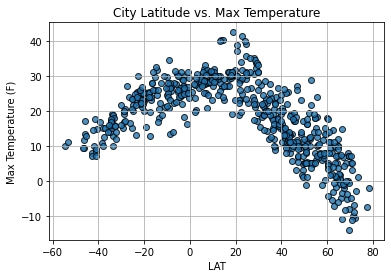

In [10]:
# Parameters
plt.scatter(weather_df['LAT'], weather_df['MAX TEMP'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("LAT")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)
plt.savefig("Max_TEMP vs LAT.png")
plt.show()


## Latitude vs. Humidity Plot

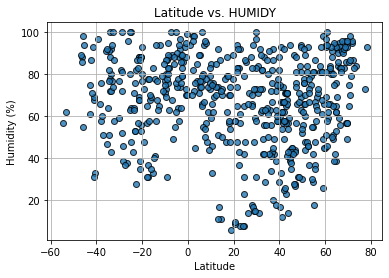

In [11]:
plt.scatter(weather_df['LAT'], weather_df['HUMIDITY'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. HUMIDY")
plt.grid(True)
plt.savefig("Humidity.png")


## Latitude vs. Cloudiness Plot

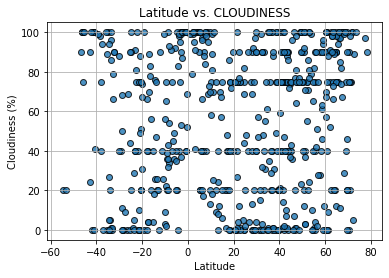

In [12]:
plt.scatter(weather_df['LAT'], weather_df['CLOUDINESS'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. CLOUDINESS")
plt.grid(True)
plt.savefig("Cloudiness.png")

## Latitude vs. Wind Speed Plot

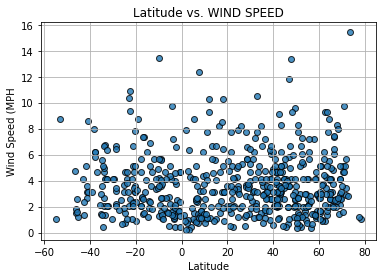

In [13]:
plt.scatter(weather_df['LAT'], weather_df['WIND SPEED'], edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH")
plt.title("Latitude vs. WIND SPEED")
plt.grid(True)
plt.savefig("WIND SPEED.png")

## Linear Regression

In [14]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = weather_df.loc[(weather_df["LAT"] >= 0)]
southern_hemisphere = weather_df.loc[(weather_df["LAT"] < 0)] 


In [16]:
# Define variables for linear_regression lines

def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

# Show plot
#plt.show()   


In [17]:
northern_hemisphere.head()

,CITY,CLOUDINESS,COUNTRY,DATE,HUMIDITY,LAT,LNG,MAX TEMP,WIND SPEED
0,Vardø,0,Vardø,1620663221,65,70.3705,31.1107,5.00,5.14
1,Horsham,40,Horsham,1620663222,48,51.0640,-0.3272,16.11,7.72
3,San Quintín,57,San Quintín,1620663225,71,30.4833,-115.9500,15.47,1.88
4,Garhi Khairo,13,Garhi Khairo,1620663226,18,28.0606,67.9803,35.14,3.66
7,Khatanga,5,Khatanga,1620663230,87,71.9667,102.5000,-10.55,3.42


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.26967957471770987


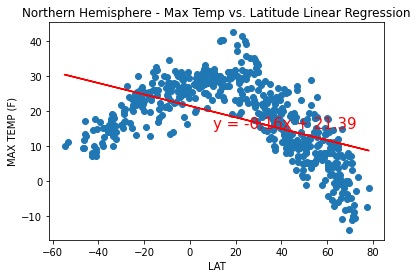

In [52]:
x_values = weather_df['LAT']
y_values = weather_df['MAX TEMP']

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("MAX TEMP (F)")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Save 
plt.savefig("Northern Hemispher MAX TEMP vs LAT REGRESS.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.26967957471770987


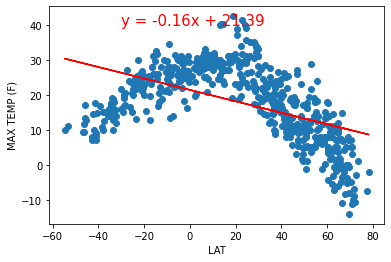

In [40]:
# Print r value

x_values = weather_df['LAT']
y_values = weather_df['MAX TEMP']

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("MAX TEMP (F)")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Save the figure
plt.savefig("SH MAX TEMP vs LAT REGRESS.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005471766669552277


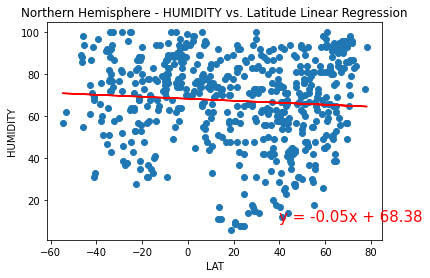

In [39]:
# Print r value
# function 
x_values = weather_df["LAT"]
y_values = weather_df["HUMIDITY"]

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("HUMIDITY")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

# Set  title
plt.title("Northern Hemisphere - HUMIDITY vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
# Save the figure
plt.savefig("Norther Hemisphere HUMIDITY vs LAT REGRESS.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.005471766669552277


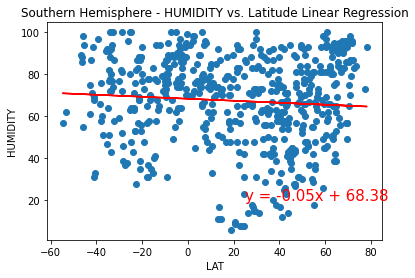

In [53]:
# Print r value
# function 
x_values = weather_df["LAT"]
y_values = weather_df["HUMIDITY"]

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("HUMIDITY")
plt.annotate(line_eq,(25,20),fontsize=15,color="red")

# Set  title
plt.title("Southern Hemisphere - HUMIDITY vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
# Save the figure
plt.savefig("Southern Hemisphere HUMIDITY vs LAT REGRESS.png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009719333797778297


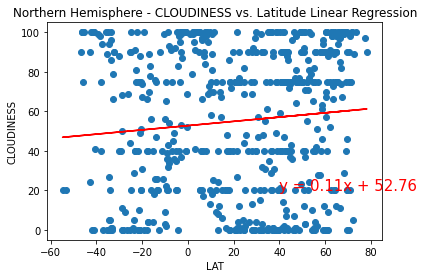

In [49]:
# Print r value
# function 

x_values = weather_df["LAT"]
y_values = weather_df["CLOUDINESS"]

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("CLOUDINESS")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Set  title
plt.title("Northern Hemisphere - CLOUDINESS vs. Latitude Linear Regression")

# Save the figure
plt.savefig("Northern Hemisphere CLOUDINESS vs LAT REGRESS.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.009719333797778297


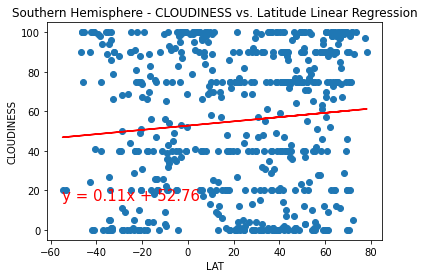

In [46]:
x_values = weather_df["LAT"]
y_values = weather_df["CLOUDINESS"]

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("CLOUDINESS")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Set  title
plt.title("Southern Hemisphere - CLOUDINESS vs. Latitude Linear Regression")

# Save the figure
plt.savefig("Southern Hemisphere CLOUDINESS vs LAT REGRESS.png")



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000722920433400974


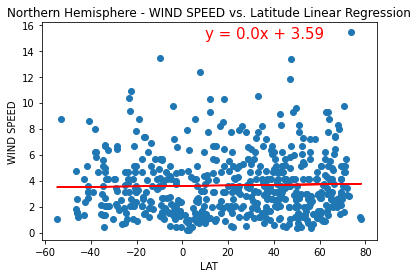

In [47]:
# Print r value
# function
x_values = weather_df['LAT']
y_values = weather_df['WIND SPEED']

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("WIND SPEED")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Set  title
plt.title("Northern Hemisphere - WIND SPEED vs. Latitude Linear Regression")

# Save the figure
plt.savefig("Northern Hemisphere LAT vs WIND SPEED.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.000722920433400974


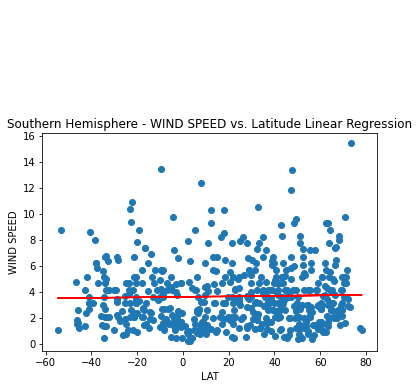

In [48]:
#print r value
# Call an function 
x_values = weather_df['LAT']
y_values = weather_df['WIND SPEED']

#equation = linear_regression(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Label plot and annotate the line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("LAT")
plt.ylabel("WIND SPEED")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

# Set  title
plt.title("Southern Hemisphere - WIND SPEED vs. Latitude Linear Regression")

# Save the figure
plt.savefig("Southern Hemisphere LAT vs WIND SPEED.png")

